First, import all necessary modules: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hydron as hd

In [2]:
#dt,tau,X,n,u,T,config = hd.Sod_tube()
dt,tau,X,n,u,T,config = hd.Boltzmann()
#dt,tau,X,n,u,T,config = hd.Diffusion()

In [3]:
sim = hd.Solver(dt,X,n,u,T,config)
sim.run(tau)


in progress ...
|-10%-|-20%-|-30%-|-40%-|-50%-|-60%-|-70%-|-80%-|-90%-|-100%|
|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx|xxxxx
done!
Elapsed time: 61.84 seconds


<hydron.hydron.Solver instance at 0x00000000069CB208>

In [4]:
print sim.time

100.0


0.734519848873 1.35648051572
1.01010101568 1.01030483071


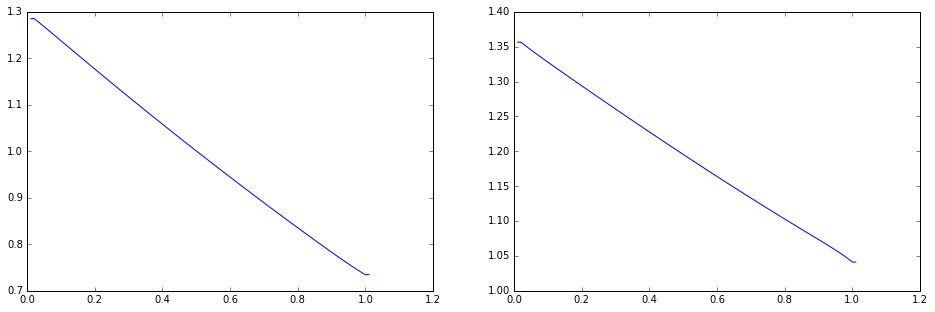

In [5]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.plot(sim.s*sim.sc.x, sim.out.n[-1]*sim.sc.n)
plt.subplot(122)
plt.plot(sim.s*sim.sc.x, sim.out.T[-1]*sim.sc.T)
print np.min(sim.out.n[-1]),np.max(sim.out.T[-1])
print np.sum(sim.out.n[0]*sim.ds), np.sum(sim.q[0]*sim.ds)

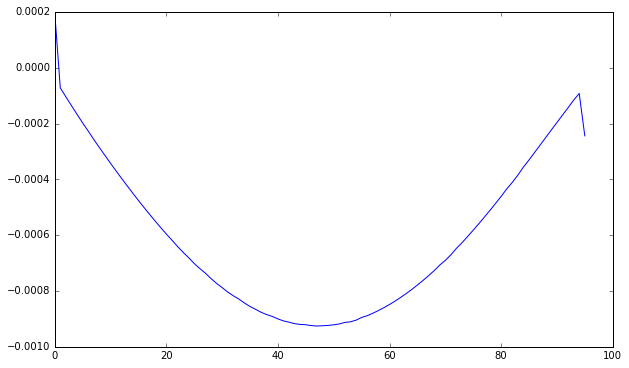

In [6]:
plt.figure(figsize = (10,6))
plt.plot((np.gradient(sim.p)/sim.ds-sim.g()*sim.q[0])[2:-2])


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


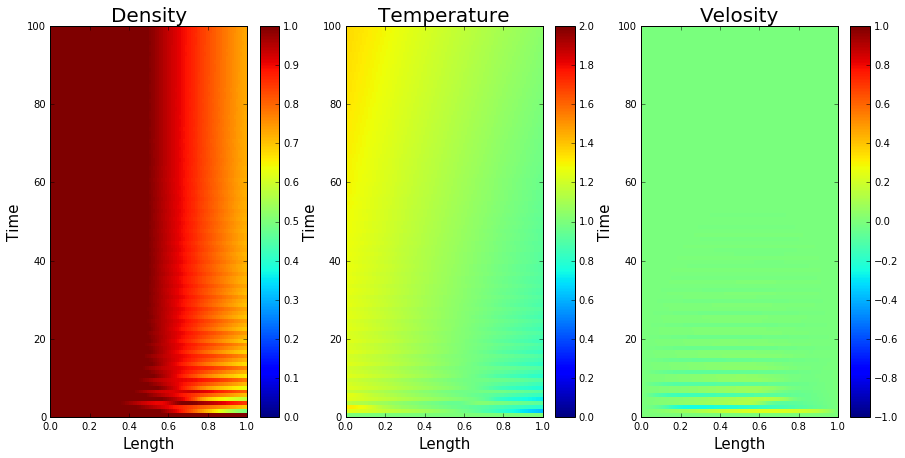

In [7]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Density', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(sim.out.n*sim.sc.n, vmin = 0, vmax = 1, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Temperature', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(sim.out.T*sim.sc.T, vmin = 0, vmax = 2, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Velosity', size = 20)
plt.xlabel('Length', size = 15)
plt.ylabel('Time', size = 15)
plt.imshow(sim.out.u*sim.sc.u, vmin = -1, vmax = 1,
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x,0,(sim.time)])
plt.colorbar()

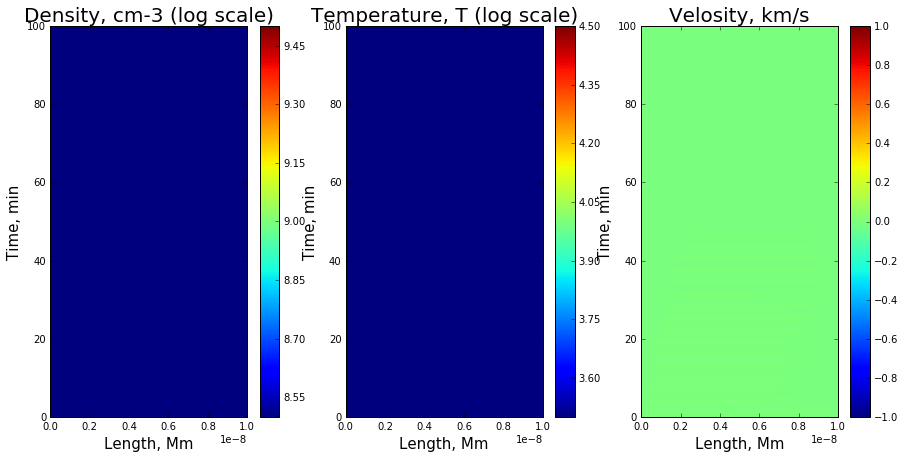

In [8]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Density, cm-3 (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(sim.out.n)+np.log10(sim.sc.n), vmin = 8.5, vmax=9.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x/1e8,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Temperature, T (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(sim.out.T)+np.log10(sim.sc.T), vmin = 3.5, vmax=4.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x/1e8,0,(sim.time)])
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Velosity, km/s', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.array(sim.out.u)*sim.sc.u/1e5, vmin = -1, vmax = 1,
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,sim.L*sim.sc.x/1e8,0,(sim.time)])
plt.colorbar()


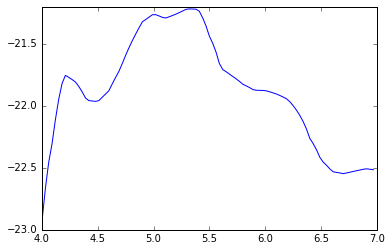

In [9]:
logT = np.arange(0,100)*0.03+4
logRL = np.log10(hd.RadLoss().get(10**logT))
plt.plot(logT,logRL)